In [ ]:
pip install imblearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns


In [ ]:
df = pd.read_csv('creditcard.csv')


In [ ]:
class_dist=df['Class'].value_counts()
print(class_dist)
print('\nClass 0: {:0.2f}%'.format(100 *class_dist[0] / (class_dist[0]+class_dist[1])))
print('Class 1: {:0.2f}%'.format(100 *class_dist[1] / (class_dist[0]+class_dist[1])))


0    284315
1       492
Name: Class, dtype: int64

Class 0: 99.83%
Class 1: 0.17%


In [ ]:
X = df.drop(columns=['Time','Class'])
y = df['Class']

x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=100,test_size=0.3,stratify=y)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy  0.9991573329588147
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.64      0.73       148

    accuracy                           1.00     85443
   macro avg       0.92      0.82      0.86     85443
weighted avg       1.00      1.00      1.00     85443



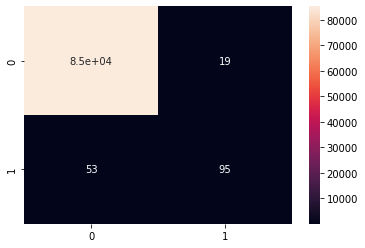

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=0.5,k_neighbors=5,random_state = 100) 
X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 


Before OverSampling, counts of label '1': 344
Before OverSampling, counts of label '0': 199020 

After OverSampling, the shape of train_X: (298530, 29)
After OverSampling, the shape of train_y: (298530,) 

After OverSampling, counts of label '1': 99510
After OverSampling, counts of label '0': 199020


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy  0.9907423662558665
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.14      0.86      0.24       148

    accuracy                           0.99     85443
   macro avg       0.57      0.93      0.62     85443
weighted avg       1.00      0.99      0.99     85443



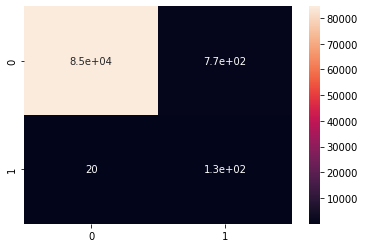

In [ ]:
lr = LogisticRegression() 
lr.fit(X_train_res, y_train_res.ravel()) 
predictions = lr.predict(x_test) 
  
print('Accuracy ',accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions)) 
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2g')
